# <span style="color:blue"><ins> Is the price range of a mobile phone predictable? </ins></span>

Authors: <ins>*Guglielmo Tedeschi, Manuel Naviglio, Alessio Franchi*</ins>

In this notebook, we aim at studying the mobile phone dataset considering both supervised and unsupervised machine learning techniques.

In particular, we focus on the target label <span style="color:green">**price_range**</span>={0,1,2,3}. We try to predict its value from the features associated with a mobile phone.

The mobile_price dataset contains **20** predictors and **1** target label:

0. **battery_power** : Total energy a battery can store in one time measured in mAh
1. **blue** : Has bluetooth or not
2. **clock_speed** : Speed at which microprocessor executes instructions
3. **dual_sim** : Has dual sim support or not
4. **fc** : Front Camera mega pixels
5. **four_g** : Has 4G or not
6. **int_memory** : Internal Memory in Gigabytes
7. **m_dep** : Mobile Depth in cm
<img src="https://cdn.pixabay.com/photo/2016/12/09/11/33/smartphone-1894723_960_720.jpg" align="right" width="420" height="320">
8. **mobile_wt** : Weight of mobile phone
9. **n_cores** : Number of cores of processor
10. **pc** : Primary Camera mega pixels
11. **px_height** : Pixel Resolution Height
12. **px_width** : Pixel Resolution Width
13. **ram** : Random Access Memory in Megabytes
14. **sc_h** : Screen Height of mobile in cm
15. **sc_w** : Screen Width of mobile in cm
16. **talk_time** : Longest time that a single battery charge will last when you are
17. **three_g** : Has 3G or not
18. **touch_screen** : Has touch screen or not
19. **wifi** : Has wifi or not
20. <span style="color:green">**price_range**</span> : Price range of the mobile

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.  Import standard libraries
2.  Remove warnings
1.  Read the dataset






In [100]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pydotplus

from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn import cluster
from sklearn import tree

from IPython.display import Image


import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv ("/content/drive/MyDrive/ML_SNS/NEPSI_mobile/mobile_price_classification.csv")

# ***Exploratory data analysis*** (EDA)

We explore the dataset, describing the predictors and visualizing the data.

What data are available?


In [101]:
data.head(5)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

Which kind of data they are?


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Few descriptions of them


In [103]:
data.describe(include='all')

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

Are there missing values ?


In [104]:
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' %  (col,data[col].isna().sum()))

Number of missing values:
	battery_power: 0
	blue: 0
	clock_speed: 0
	dual_sim: 0
	fc: 0
	four_g: 0
	int_memory: 0
	m_dep: 0
	mobile_wt: 0
	n_cores: 0
	pc: 0
	px_height: 0
	px_width: 0
	ram: 0
	sc_h: 0
	sc_w: 0
	talk_time: 0
	three_g: 0
	touch_screen: 0
	wifi: 0
	price_range: 0


How our target is distributed


<Axes: title={'center': 'Target: Price range'}>

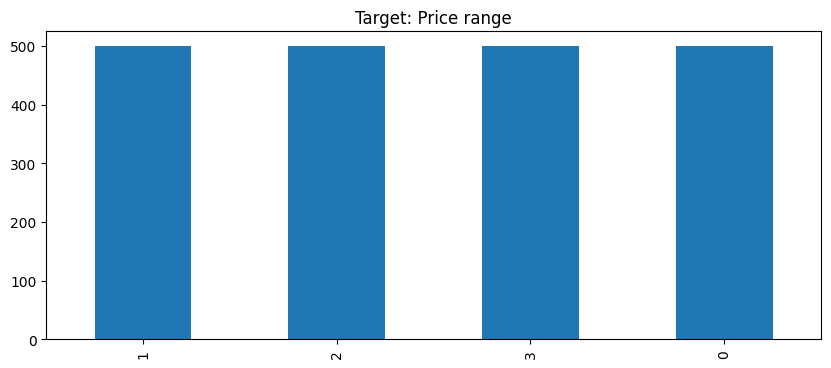

In [105]:
plt.figure(figsize=(10,4))
data['price_range'].value_counts().plot(kind='bar', title='Target: Price range')

How our target describe dataset

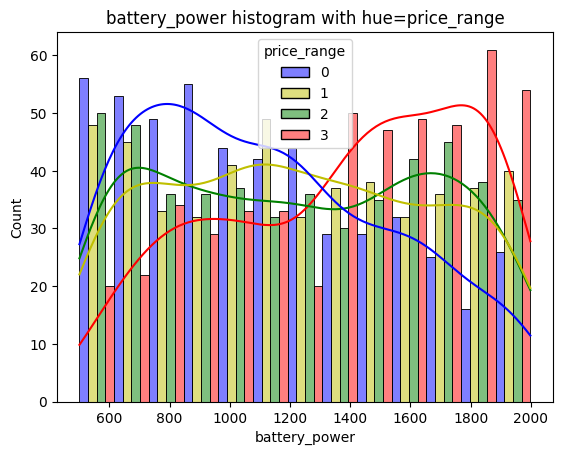

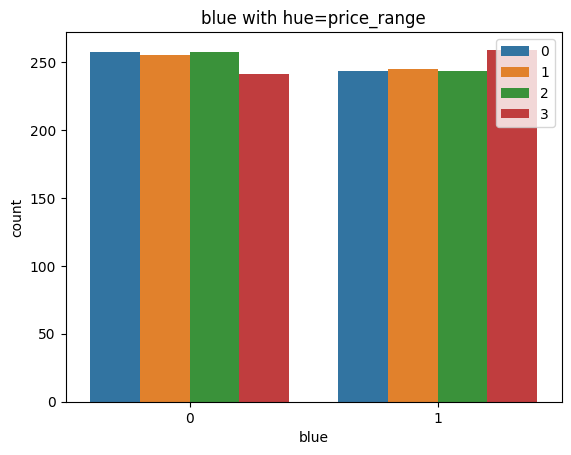

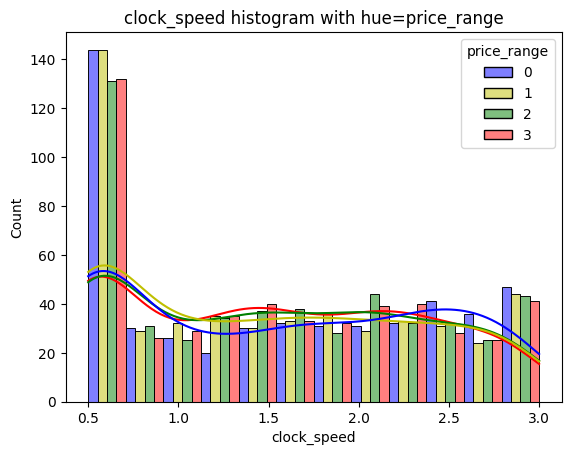

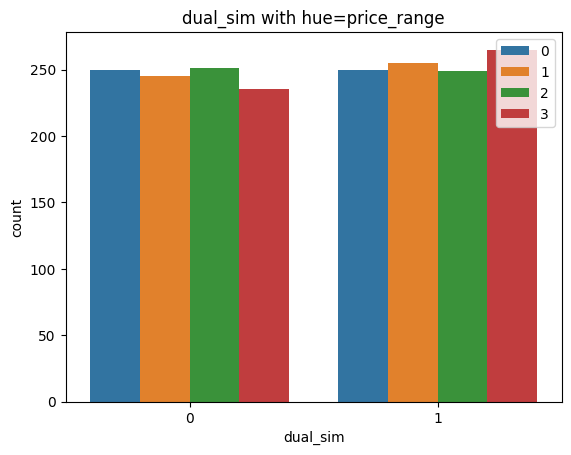

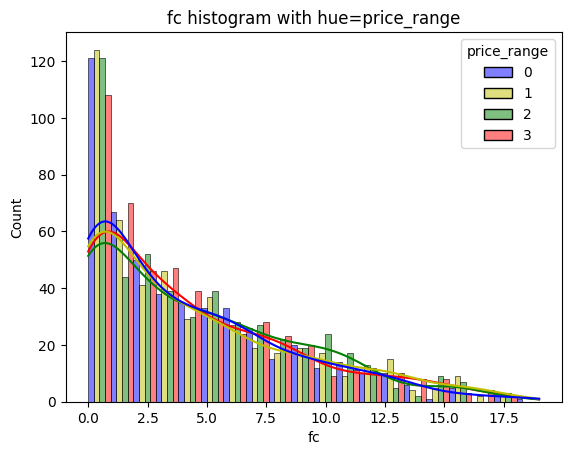

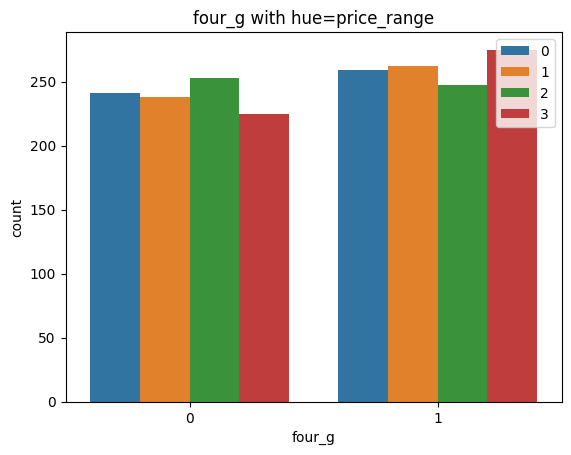

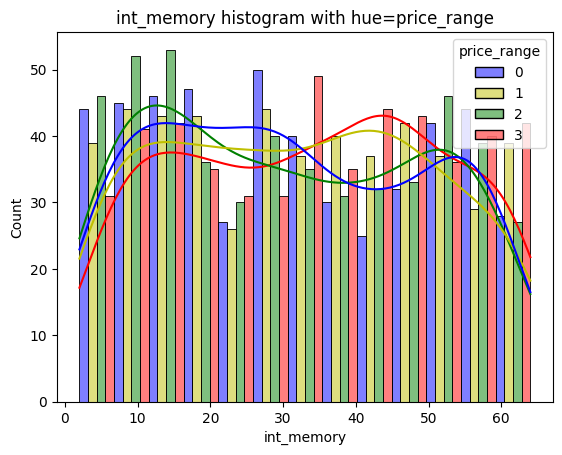

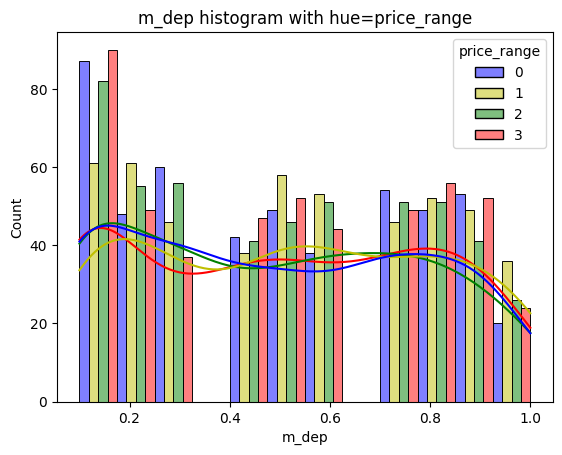

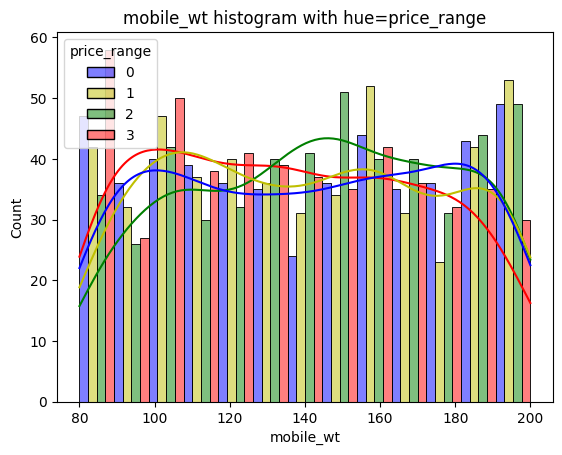

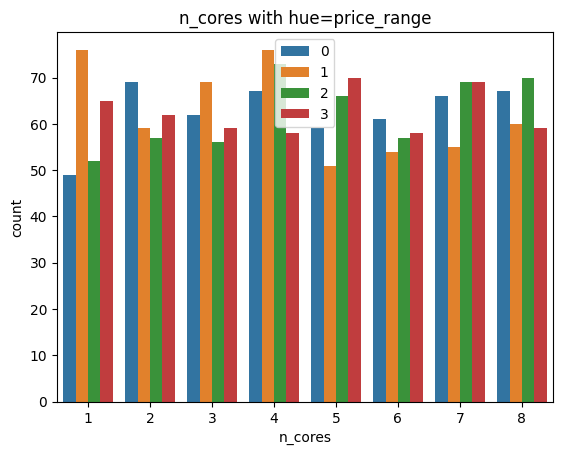

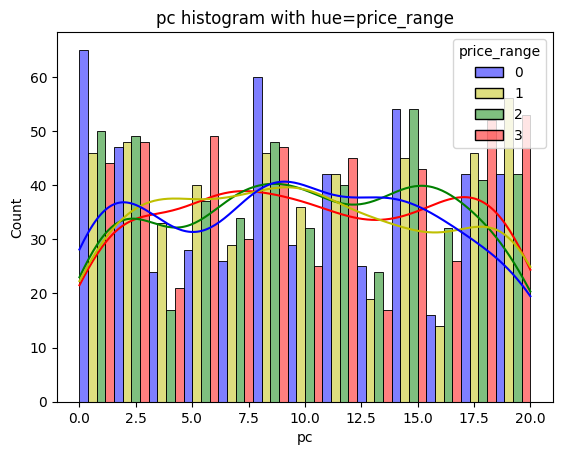

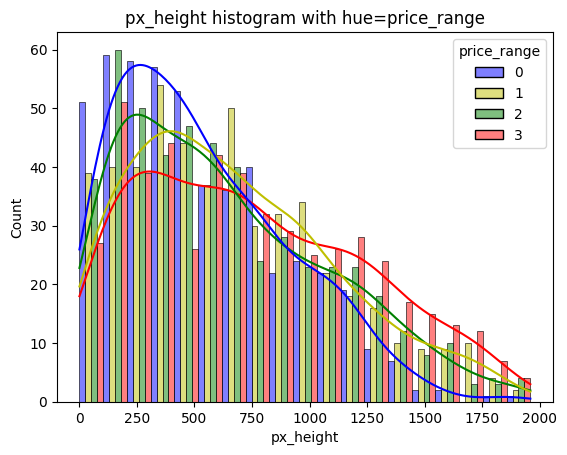

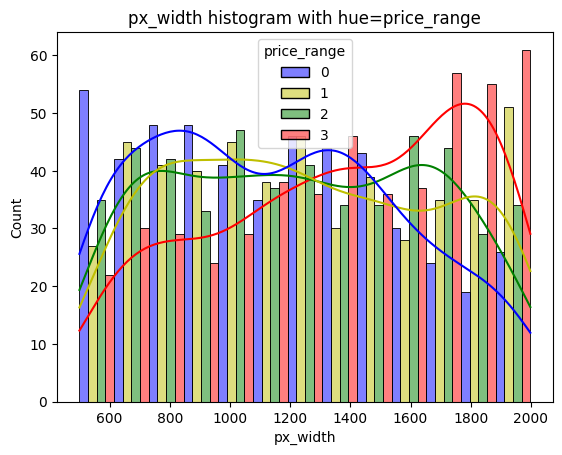

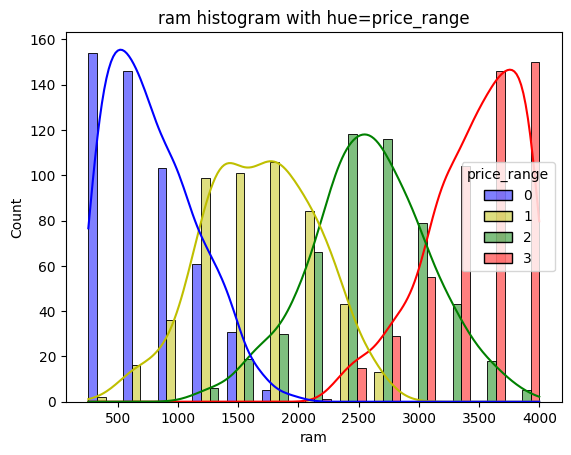

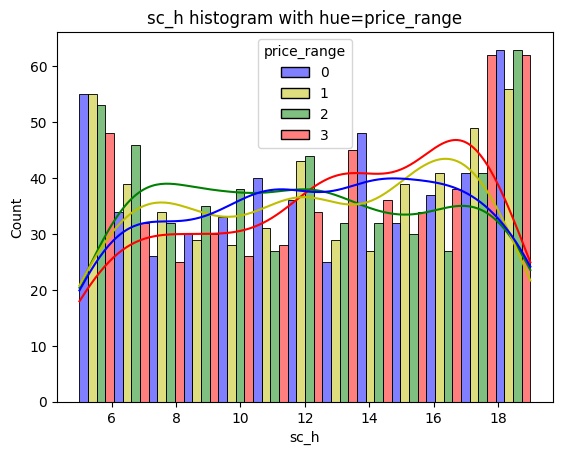

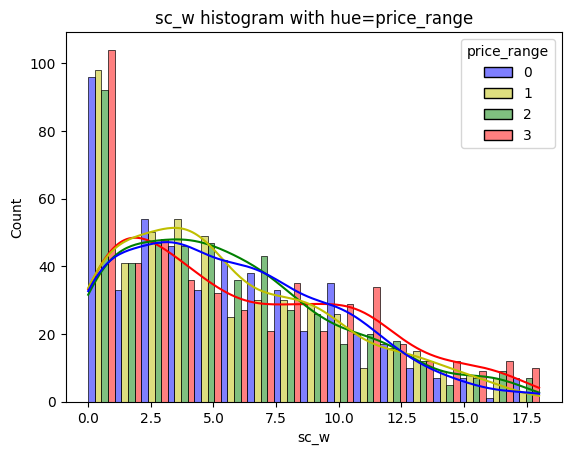

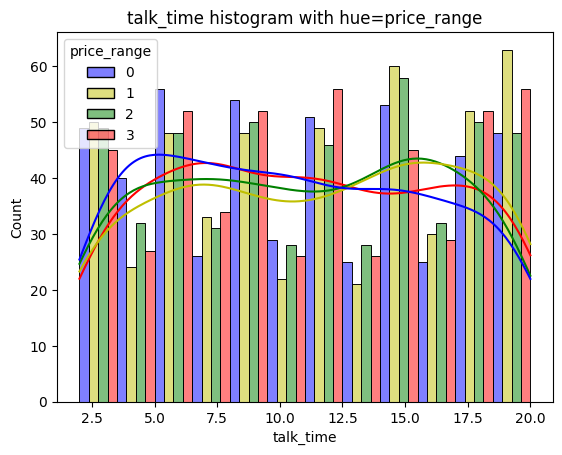

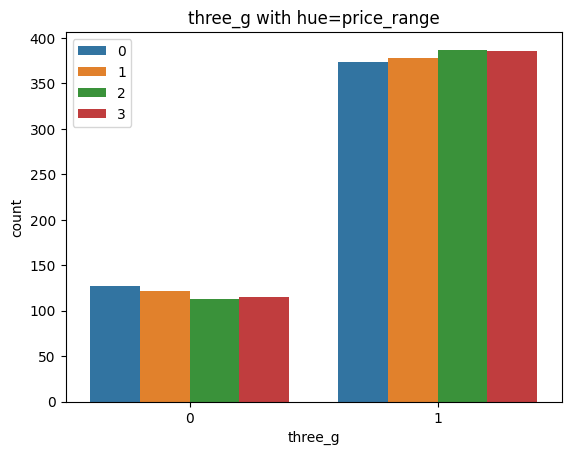

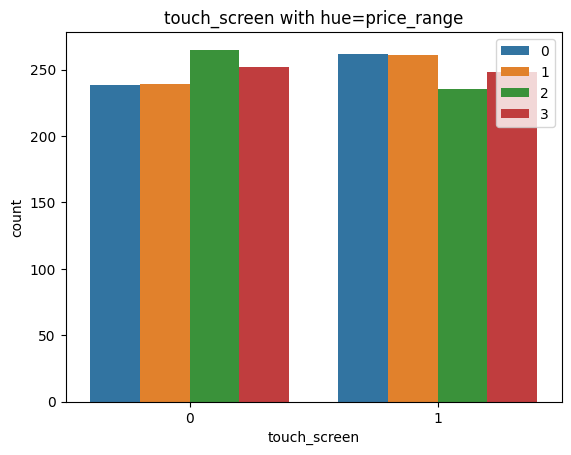

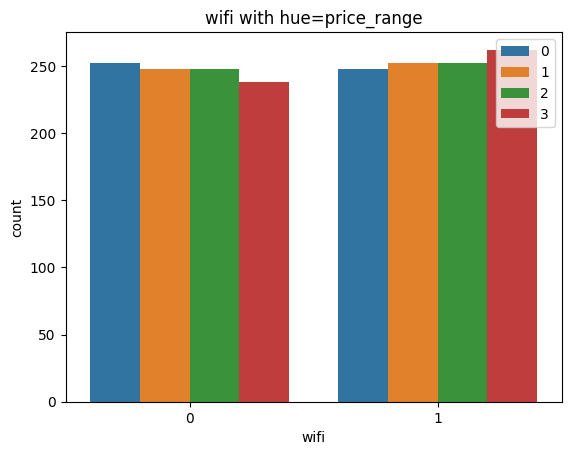

In [106]:
predictors = data.columns.drop('price_range')

for pred in predictors:
    if len(data[pred].unique()) < 10:
        g = sns.countplot(data=data, x=pred, hue='price_range')
        g.set_title(pred + ' with hue=price_range')
        plt.legend(loc='best')
    else:
        g = sns.histplot(data=data, x=pred, hue='price_range', multiple='dodge', palette=['b', 'y', 'g', 'r'], kde=True)
        g.set_title(pred + ' histogram with hue=price_range')
    plt.show()

Correlation map

<Axes: title={'center': 'Correlation matrix'}>

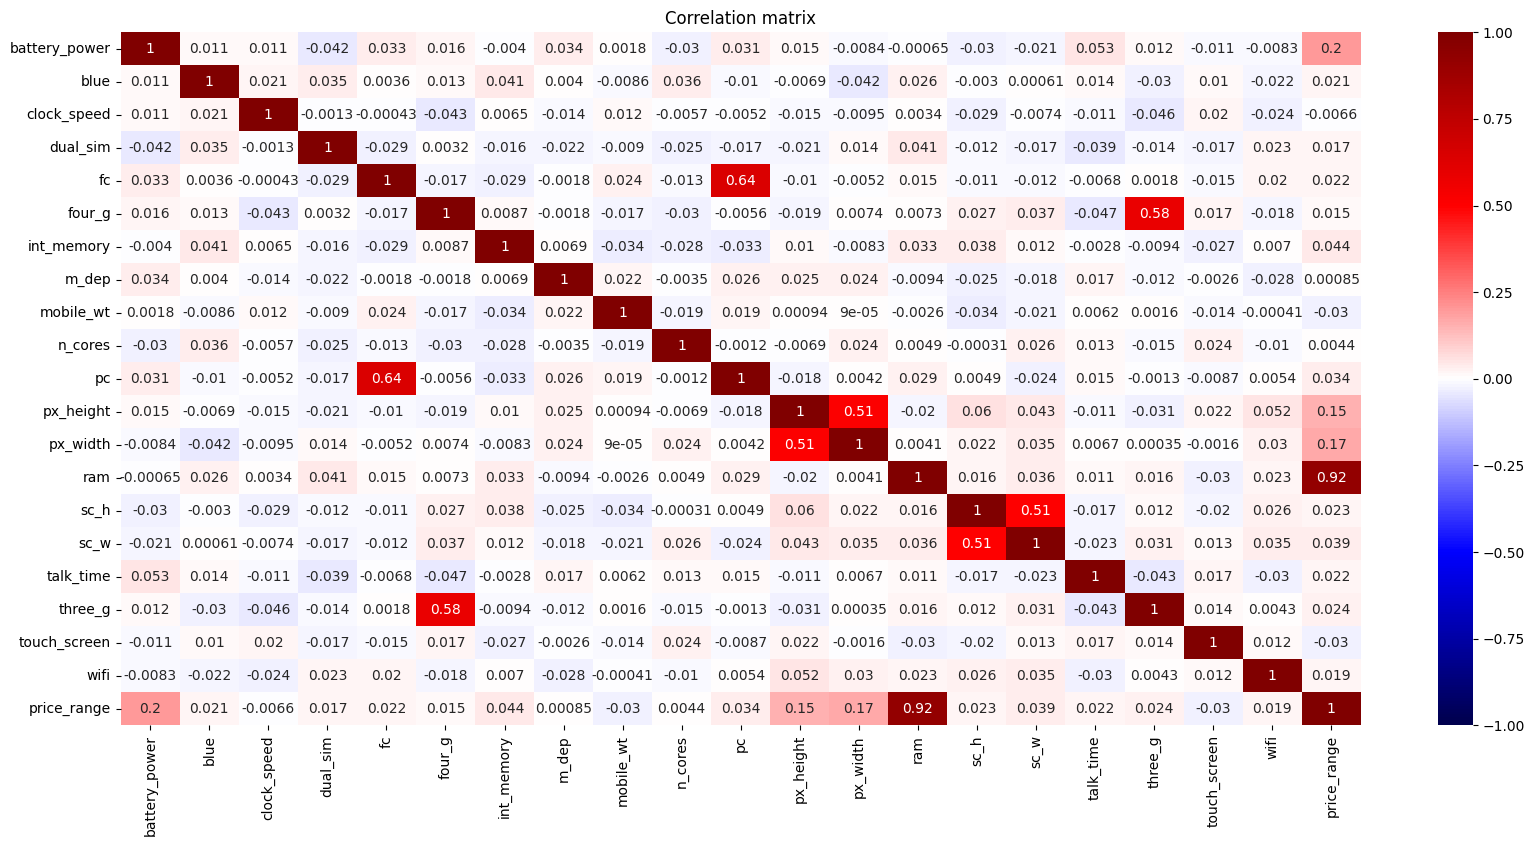

In [107]:
plt.figure(figsize=(20,9))
plt.title('Correlation matrix')
sns.heatmap(data.corr(), annot=True, cmap='seismic', vmin=-1, vmax=1)

# ***Preprocessing***

Before implementing model, we preprocess the data

## PCA

We exploit PCA to spot the minimum number of components explaining the 95% of the variance of the dataset. 

In [108]:
n_data = data.drop('price_range',axis=1)

x = n_data.values
y = data['price_range'].values

In [109]:
THRESHOLD = 0.95
pca = PCA(n_components=THRESHOLD)
x_pca = pca.fit_transform(n_data)

PCA analysis results

The 95% of the variance is explained by 4 components


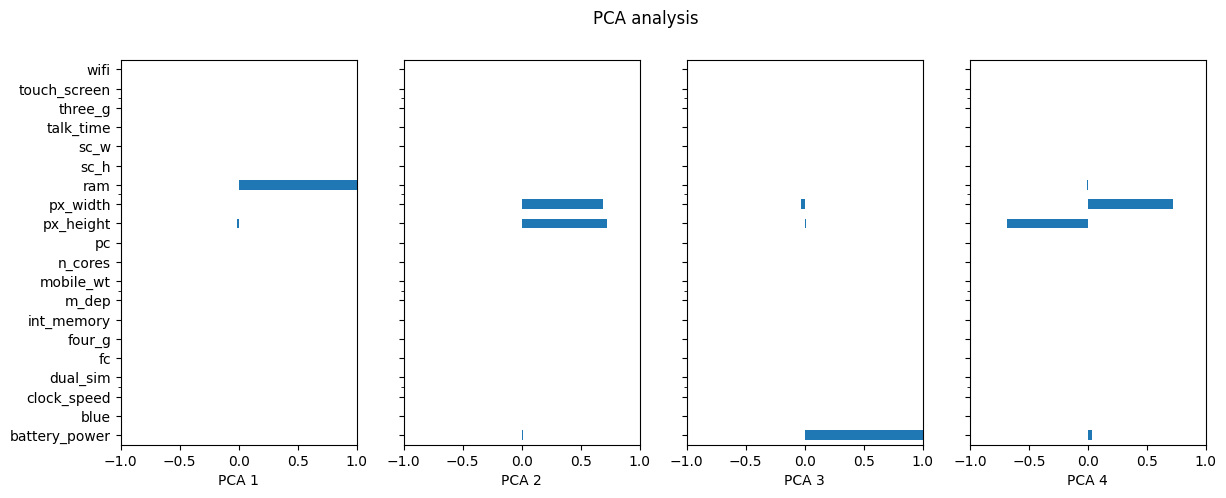

In [110]:
print(f"The {THRESHOLD*100:.0f}% of the variance is explained by {pca.n_components_} components")
components = pd.DataFrame(pca.components_.T, index = n_data.columns, columns=["PCA "+str(i) for i in range(1, pca.n_components_+1)])

fig, ax = plt.subplots(1, len(components.columns), sharey=True, sharex=True, figsize=(14, 5))
plt.suptitle("PCA analysis")

for i, col in enumerate(components.columns):
    components["PCA "+str(i+1)].plot(kind='barh', ax=ax[i], xlabel="PCA "+str(i+1), xlim=[-1,1])
    
plt.show()

The PCA allows us to easily interpret the predictors that are useful to explain the variance within the dataset:
- PCA_1 $\sim$ RAM
- PCA_2 $\sim$ PX_WIDTH + PX_HEIGHT
- PCA_3 $\sim$ BATTERY_POWER
- PCA_4 $\sim$ PX_WIDTH - PX_HEIGHT

<Axes: title={'center': 'Explained Variance'}>

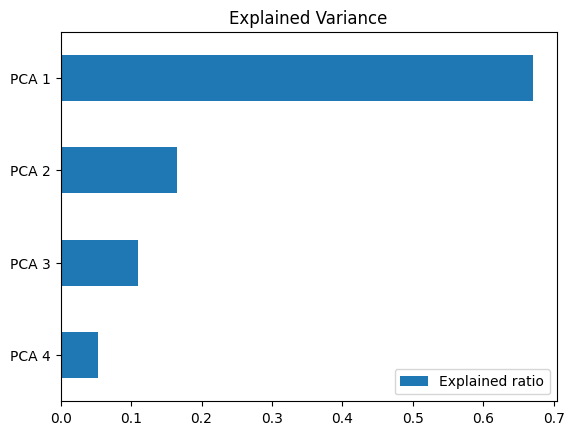

In [111]:
new_data = pd.DataFrame(x_pca, columns=["PCA "+str(i) for i in range(1, pca.n_components_+1)])

pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained ratio'], index=["PCA "+str(i) for i in range(1, pca.n_components_+1)])\
                                 .sort_values(by='Explained ratio', ascending=True).plot(kind='barh', title="Explained Variance")

Scatter matrix of the PCA components

Text(0.5, 0.98, 'Scatter matrix colored by price_range')

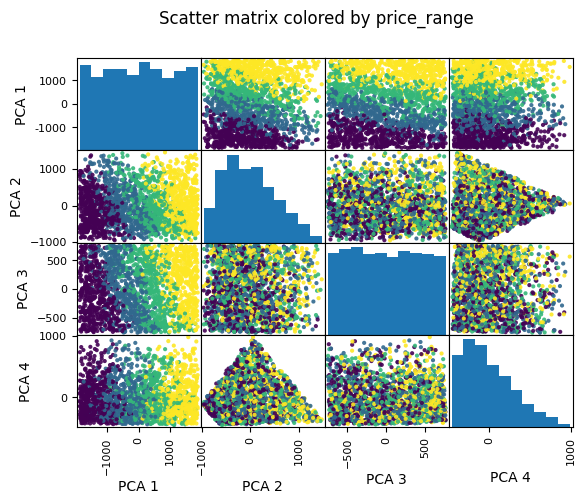

In [112]:
g = pd.plotting.scatter_matrix(new_data, c=data['price_range'], alpha=0.9)
plt.suptitle("Scatter matrix colored by price_range")

# ***Data aggregation and data engineering***

we created a new dataset to observe only the selected features.

px_height and px_width have been merged in total area (screen resolution).

battery_power   ram       px
0            842  2549    15120
1           1021  2631  1799140
2            563  2603  2167308
3            615  2769  2171776
4           1821  1411  1464096

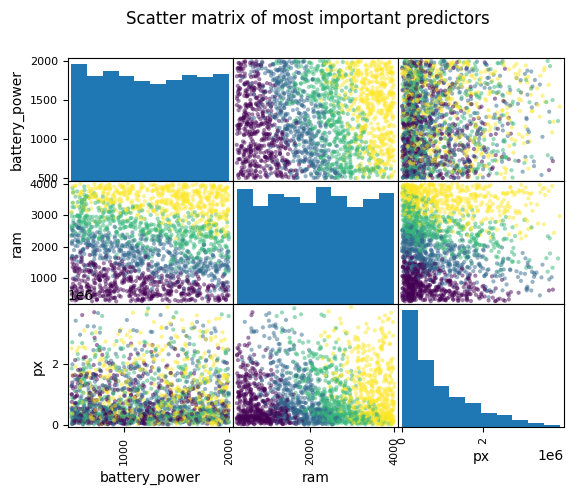

In [113]:
data = pd.read_csv("/content/drive/MyDrive/ML_SNS/NEPSI_mobile/mobile_price_classification.csv")
y = data['price_range']

data['px'] = (data['px_height'] * data['px_width']) 


data = data[['battery_power', 'ram', 'px']]
pd.plotting.scatter_matrix(data, c=y)
plt.suptitle("Scatter matrix of most important predictors")

data.head()


# ***Decision Tree***

We approach the dataset as a supervised problem by considering a Decision Tree classifier algorithm.

We first apply this ML model to the whole dataset and predictors.

## Over all data

Import all data again

In [114]:
data = pd.read_csv("/content/drive/MyDrive/ML_SNS/NEPSI_mobile/mobile_price_classification.csv")
y = data['price_range']
data = data.drop(['price_range'], axis=1)
predictors = [col for col in data.columns]
x = data[predictors].values

Construct a train set and test set (train - test - split)


In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

How splitting looks like

In [116]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600,), (400,))

### Parameter Tuning

Select best parameters:



*   Maxdepths
*   Min_samples_split 
*   Min_samples_leaf
*   Criterion








Text(0, 0.5, 'Accuracy')

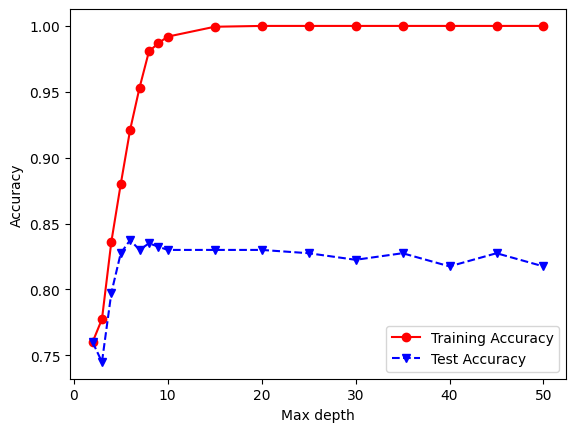

In [117]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

maxdepths = [n for n in range(2, 10)] + [n for n in range(10, 51, 5)]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0

for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(x_train, y_train)
    Y_predTrain = clf.predict(x_train)
    Y_predTest = clf.predict(x_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [118]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [119]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
              'criterion': ['gini', 'entropy']
             }

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100)
random_search.fit(x, y)
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.854 (std: 0.017)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': None, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.852 (std: 0.019)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 16, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.852 (std: 0.019)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 15, 'criterion': 'gini'}



### Train

In [120]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=18, min_samples_split=2, min_samples_leaf=10)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=18, min_samples_leaf=10)

In [121]:
y_pred = clf.predict(x_train)
y_predTest = clf.predict(x_test)

#### Analysis

In [122]:
print('#'*50)
print('Train results'.center(50))
print('#'*50)

print('Accuracy %.2f' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))
print('Confusion matrix')
print(confusion_matrix(y_train, y_pred))

print('#'*50)
print('Test results'.center(50))
print('#'*50)

print('Accuracy %.2f' % accuracy_score(y_test, y_predTest))
print('F1-score %s' % f1_score(y_test, y_predTest, average=None))
print(classification_report(y_test, y_predTest))
print('Confusion matrix')
print(confusion_matrix(y_test, y_predTest))

##################################################
                  Train results                   
##################################################
Accuracy 0.91
F1-score [0.94403893 0.87301587 0.88156288 0.94146949]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       400
           1       0.93      0.82      0.87       400
           2       0.86      0.90      0.88       400
           3       0.94      0.94      0.94       400

    accuracy                           0.91      1600
   macro avg       0.91      0.91      0.91      1600
weighted avg       0.91      0.91      0.91      1600

Confusion matrix
[[388  12   0   0]
 [ 34 330  36   0]
 [  0  14 361  25]
 [  0   0  22 378]]
##################################################
                   Test results                   
##################################################
Accuracy 0.83
F1-score [0.90140845 0.8        0.784689   0.84848485]
              precision    

Area Under Curve (AUC)

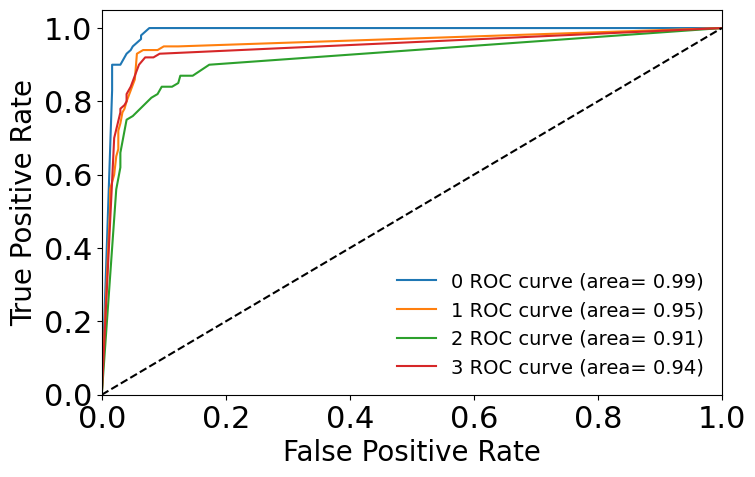

In [123]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = clf.predict_proba(x_test)

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(by_test[:,i], by_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc 


plt.figure(figsize=(8,5))
for i in range(4):
    plt.plot(fpr[i], tpr[i],
             label='%s ROC curve (area= %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]))


plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc='lower right', fontsize=14, frameon=False)
plt.show()

Cross validation results

In [124]:
scores = cross_val_score(clf, x_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() *2))

scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1_macro')
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() *2))

Accuracy: 0.8406 (+/- 0.06)
Accuracy: 0.8392 (+/- 0.06)


Plot the importances retrieved by the Decision Tree Classifier

<Axes: title={'center': 'Feature importances'}>

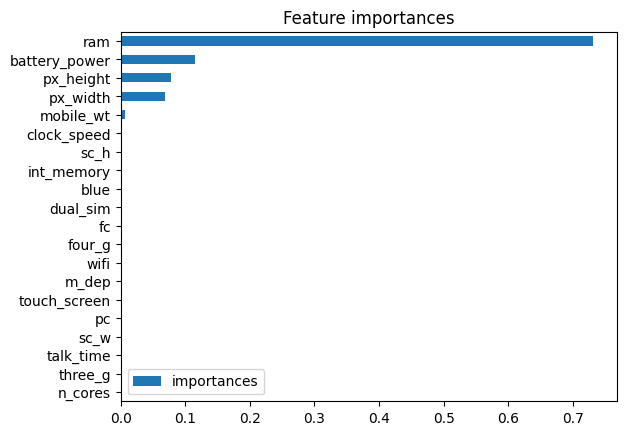

In [125]:
pd.DataFrame(clf.feature_importances_, index=predictors, columns=['importances'])\
                    .sort_values(by='importances', ascending=True).plot(kind='barh', title='Feature importances')

How Decision Tree looks like (colored by price range)

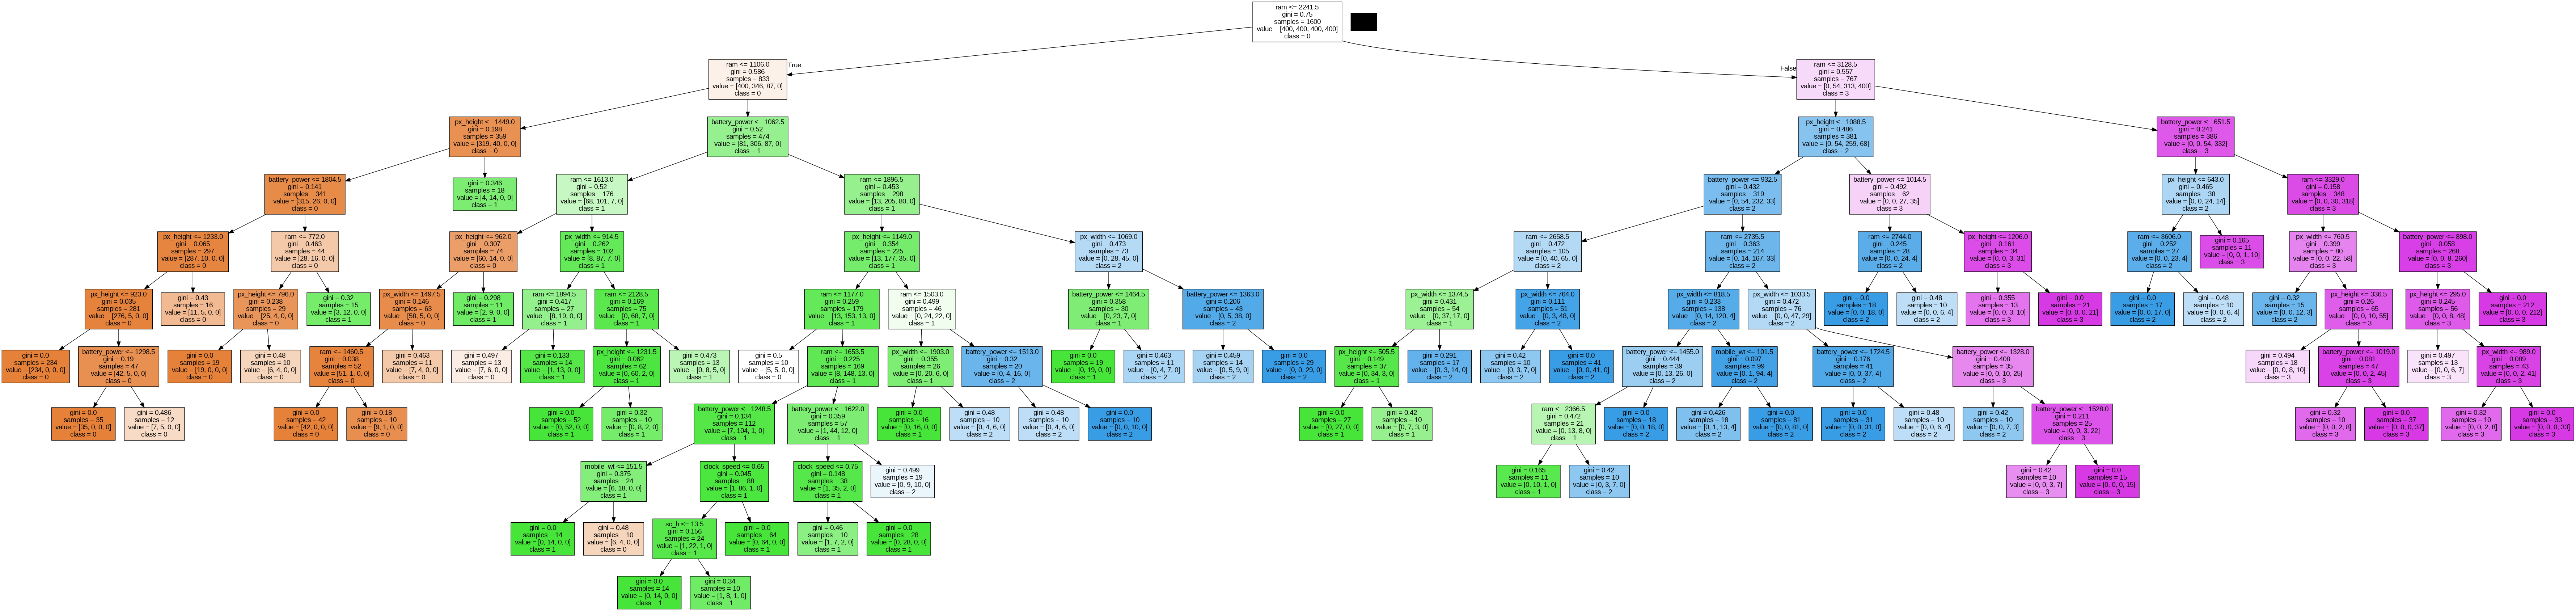

In [126]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=predictors, class_names=['0','1','2','3'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## Over the engineered data

Import all data again

In [127]:
data = pd.read_csv ("/content/drive/MyDrive/ML_SNS/NEPSI_mobile/mobile_price_classification.csv")
data['px'] = (data['px_height'] * data['px_width'])
y = data['price_range']
data = data[['battery_power', 'ram', 'px']]

predictors = [col for col in data.columns]
x = data[predictors].values


Construct a train set and test set (train - test - split)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100, stratify=y)

How splitting looks like

In [129]:
print (predictors)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

['battery_power', 'ram', 'px']


((1600, 3), (400, 3), (1600,), (400,))

### Parameter Tuning

Select best parameters:



*   Maxdepths
*   Min_samples_split
*   Min_samples_leaf
*   Criterion





Text(0, 0.5, 'Accuracy')

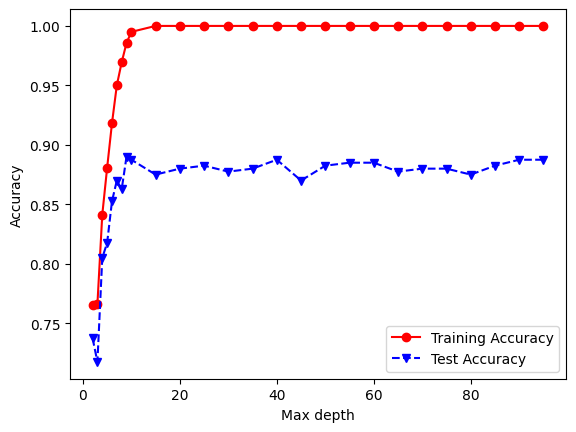

In [130]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()
maxdepths = [n for n in range(2, 10)] + [n for n in range(10, 100, 5)]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(x_train, y_train)
    Y_predTrain = clf.predict(x_train)
    Y_predTest = clf.predict(x_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1
    

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [131]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [132]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
               'criterion': ['gini', 'entropy']
             }

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100)
random_search.fit(x, y)
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.884 (std: 0.004)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 15, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.878 (std: 0.010)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 8, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.875 (std: 0.013)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 8, 'criterion': 'gini'}



### Train

In [133]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_split=2, min_samples_leaf=1)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17)

In [134]:
y_pred = clf.predict(x_train)
y_predTest = clf.predict(x_test)

#### Analysis

In [135]:
print('#'*50)
print('Train results'.center(50))
print('#'*50)

print('Accuracy %.2f' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))
print('Confusion matrix')
print(confusion_matrix(y_train, y_pred))

print('#'*50)
print('Test results'.center(50))
print('#'*50)

print('Accuracy %.2f' % accuracy_score(y_test, y_predTest))
print('F1-score %s' % f1_score(y_test, y_predTest, average=None))
print(classification_report(y_test, y_predTest))
print('Confusion matrix')
print(confusion_matrix(y_test, y_predTest))

##################################################
                  Train results                   
##################################################
Accuracy 1.00
F1-score [1. 1. 1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Confusion matrix
[[400   0   0   0]
 [  0 400   0   0]
 [  0   0 400   0]
 [  0   0   0 400]]
##################################################
                   Test results                   
##################################################
Accuracy 0.90
F1-score [0.93658537 0.85714286 0.85279188 0.93069307]
              precision    recall  f1-score   support

    

Area Under Curve (AUC)

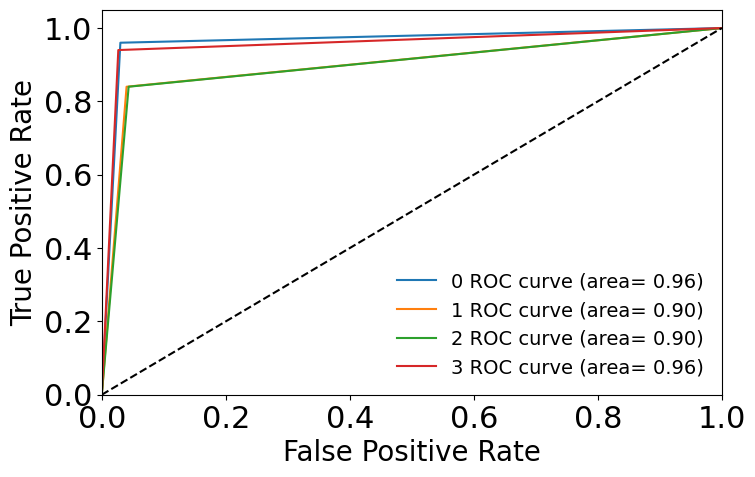

In [136]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = clf.predict_proba(x_test)

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(by_test[:,i], by_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc 


plt.figure(figsize=(8,5))
for i in range(4):
    plt.plot(fpr[i], tpr[i],
             label='%s ROC curve (area= %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]))


plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc='lower right', fontsize=14, frameon=False)
plt.show()

Cross validation results

In [137]:
scores = cross_val_score(clf, x_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() *2))

scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1_macro')
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() *2))

Accuracy: 0.8844 (+/- 0.03)
Accuracy: 0.8855 (+/- 0.02)


Plot the importances retrieved by the Decision Tree Classifier

<Axes: title={'center': 'Feature importances'}>

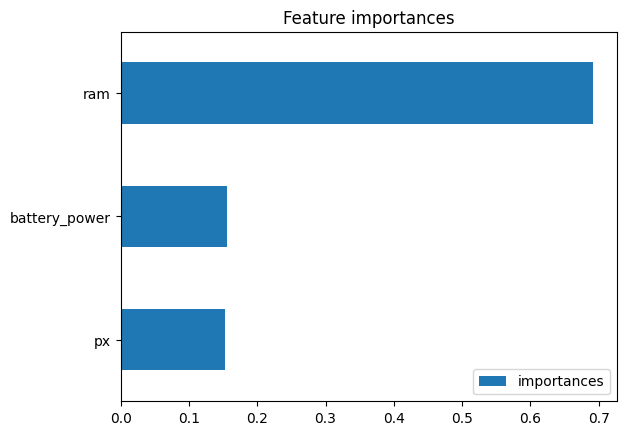

In [138]:
pd.DataFrame(clf.feature_importances_, index=predictors, columns=['importances'])\
                    .sort_values(by='importances', ascending=True).plot(kind='barh', title='Feature importances')

How Decision Tree looks like (colored by price range)

In [139]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=predictors, class_names=['0','1','2','3'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

# ***Ensembles***

## Over all data

In [140]:
data = pd.read_csv ("/content/drive/MyDrive/ML_SNS/NEPSI_mobile/mobile_price_classification.csv")

y = data['price_range']
data = data.drop(['price_range'], axis=1)
predictors = [col for col in data.columns]
x = data[predictors].values

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50, stratify=y)

In [142]:
print (predictors)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
(1400, 20) (600, 20) (1400,) (600,)


RF_Accuracy 0.88
BG_Accuracy 0.90
ADA_Accuracy 0.85


<Axes: title={'center': 'Feature importances'}>

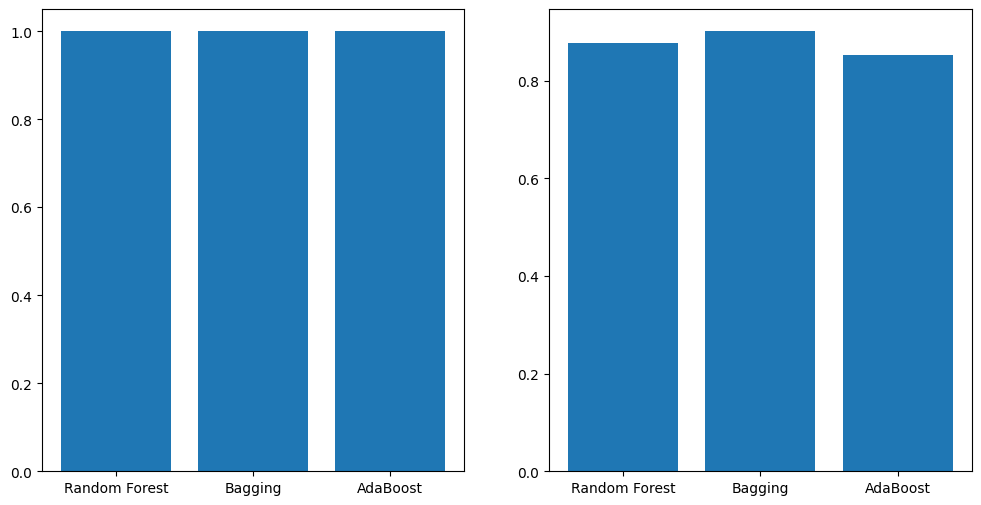

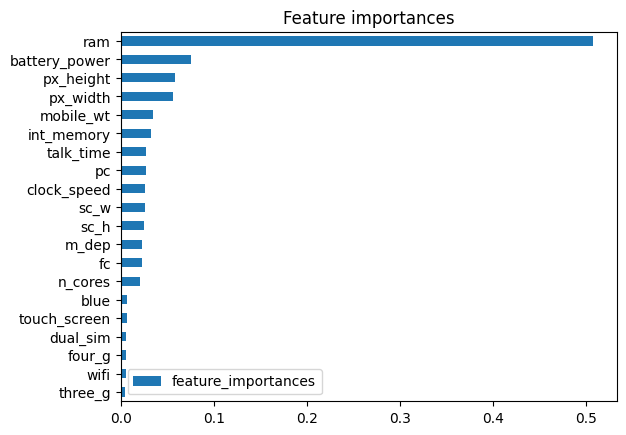

In [143]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 50
trainAcc = []
testAcc = []

RF = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers,criterion='entropy',min_samples_split=2,min_samples_leaf=1,class_weight=None)
RF.fit(x_train, y_train)
Y_predTrain = RF.predict(x_train)
Y_predTest = RF.predict(x_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))
print('RF_Accuracy %.2f' % accuracy_score(y_test, Y_predTest))

BG = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
BG.fit(x_train, y_train)
Y_predTrain = BG.predict(x_train)
Y_predTest = BG.predict(x_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))
print('BG_Accuracy %.2f' % accuracy_score(y_test, Y_predTest))


ADA = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
ADA.fit(x_train, y_train)
Y_predTrain = ADA.predict(x_train)
Y_predTest = ADA.predict(x_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))
print('ADA_Accuracy %.2f' % accuracy_score(y_test, Y_predTest))


methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

pd.DataFrame(RF.feature_importances_.T, index=data.columns, columns=['feature_importances'])\
                                        .sort_values('feature_importances').plot(kind='barh', title='Feature importances')




## On the engineered data

In [144]:
data = pd.read_csv ("/content/drive/MyDrive/ML_SNS/NEPSI_mobile/mobile_price_classification.csv")
data['px'] = (data['px_height'] * data['px_width']) 


y = data['price_range']
data = data[['battery_power', 'ram', 'px']]


predictors = [col for col in data.columns]
x = data[predictors].values


In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50, stratify=y)
print (predictors)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

['battery_power', 'ram', 'px']
(1400, 3) (600, 3) (1400,) (600,)


RF_Accuracy 0.91
BG_Accuracy 0.91
ADA_Accuracy 0.92


[Text(1.5, 0, 'Random Forest'),
 Text(2.5, 0, 'Bagging'),
 Text(3.5, 0, 'AdaBoost')]

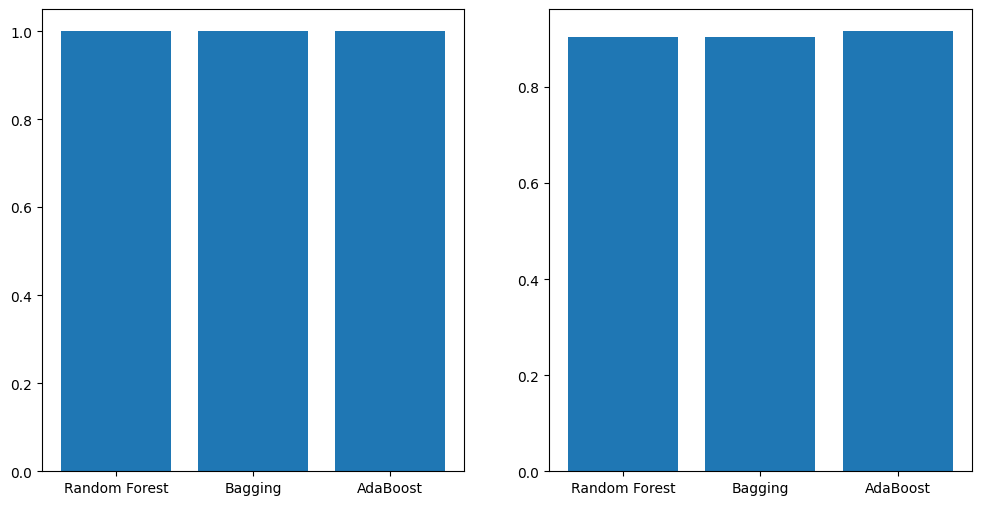

In [146]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

RF = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers,criterion='entropy',min_samples_split=4,min_samples_leaf=1,class_weight=None)
RF.fit(x_train, y_train)
Y_predTrain = RF.predict(x_train)
Y_predTest = RF.predict(x_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))
print('RF_Accuracy %.2f' % accuracy_score(y_test, Y_predTest))

BG = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
BG.fit(x_train, y_train)
Y_predTrain = BG.predict(x_train)
Y_predTest = BG.predict(x_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))
print('BG_Accuracy %.2f' % accuracy_score(y_test, Y_predTest))


ADA = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
ADA.fit(x_train, y_train)
Y_predTrain = ADA.predict(x_train)
Y_predTest = ADA.predict(x_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))
print('ADA_Accuracy %.2f' % accuracy_score(y_test, Y_predTest))


methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

# ***SVM***

## Over all data

In [147]:
data = pd.read_csv ("/content/drive/MyDrive/ML_SNS/NEPSI_mobile/mobile_price_classification.csv")
y = data['price_range']
data = data.drop(['price_range'], axis=1)
predictors = [col for col in data.columns]
x = data[predictors].values

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50, stratify=y)

In [149]:
print (predictors)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
(1400, 20) (600, 20) (1400,) (600,)


Text(0, 0.5, 'Accuracy')

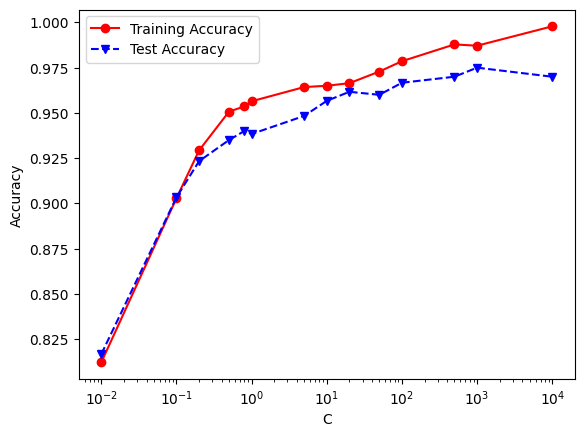

In [150]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50, 100, 500, 1000, 10000]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    SVM = SVC(C=param,kernel='rbf')
    SVM.fit(x_train, y_train)
    Y_predTrain = SVM.predict(x_train)
    Y_predTest = SVM.predict(x_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')


Support Vector Machine Total (SVM_T)

In [151]:
SVM_T = SVC(C=1000,kernel='rbf',probability=True)
SVM_T.fit(x_train, y_train)
Y_predTrain = SVM_T.predict(x_train)
Y_predTest = SVM_T.predict(x_test)
print('SVM_Accuracy %.2f' % accuracy_score(y_test, Y_predTest))

SVM_Accuracy 0.97


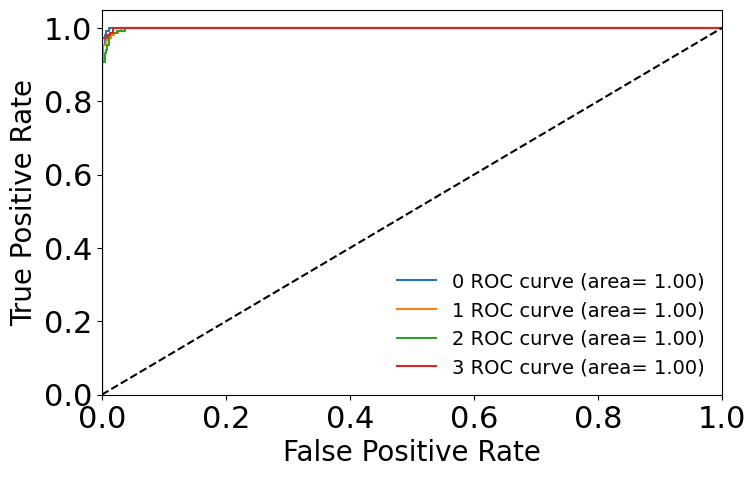

In [152]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = SVM_T.predict_proba(x_test)

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(by_test[:,i], by_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc 


plt.figure(figsize=(8,5))
for i in range(4):
    plt.plot(fpr[i], tpr[i],
             label='%s ROC curve (area= %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]))


plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc='lower right', fontsize=14, frameon=False)
plt.show()

## On the engineered data

In [153]:
data = pd.read_csv ("/content/drive/MyDrive/ML_SNS/NEPSI_mobile/mobile_price_classification.csv")
data['px'] = (data['px_height'] * data['px_width'])

y = data['price_range']
data = data[['battery_power', 'ram', 'px']]


predictors = [col for col in data.columns]
x = data[predictors].values

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50, stratify=y)
print (predictors)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

['battery_power', 'ram', 'px']
(1400, 3) (600, 3) (1400,) (600,)


Text(0, 0.5, 'Accuracy')

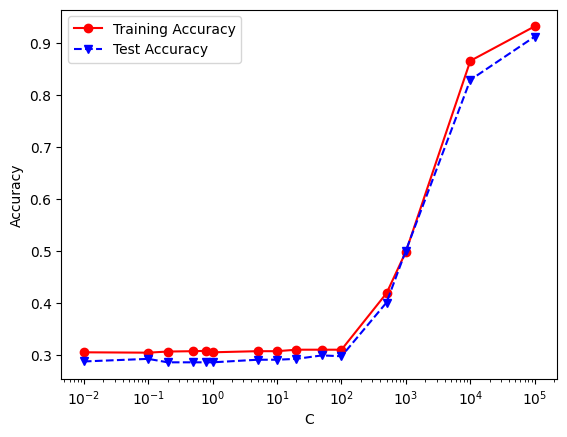

In [155]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50, 100, 500, 1000, 10000, 100000]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    SVM = SVC(C=param,kernel='rbf')
    SVM.fit(x_train, y_train)
    Y_predTrain = SVM.predict(x_train)
    Y_predTest = SVM.predict(x_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

Support Vector Machine Partial (SVM_P)

In [156]:
SVM_P = SVC(C=100000,kernel='rbf')
SVM_P.fit(x_train, y_train)
Y_predTrain = SVM_P.predict(x_train)
Y_predTest = SVM_P.predict(x_test)
print('SVM_Accuracy %.2f' % accuracy_score(y_test, Y_predTest))

SVM_Accuracy 0.91


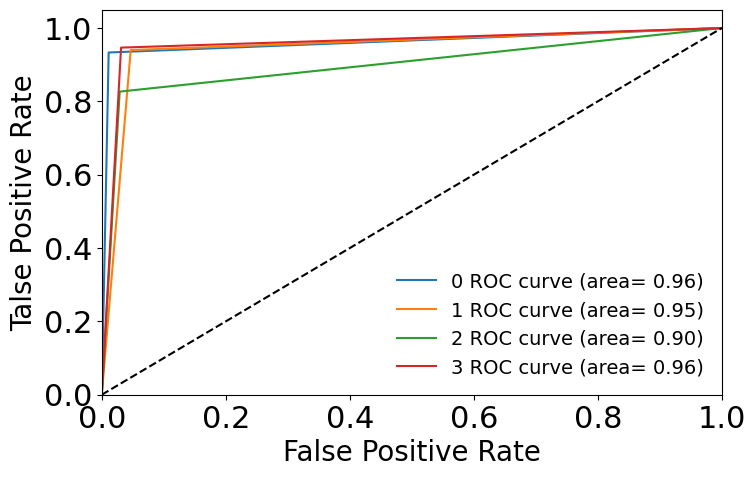

In [157]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(Y_predTest)

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(by_test[:,i], by_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc 


plt.figure(figsize=(8,5))
for i in range(4):
    plt.plot(fpr[i], tpr[i],
             label='%s ROC curve (area= %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]))


plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('Talse Positive Rate', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc='lower right', fontsize=14, frameon=False)
plt.show()

# NEPSI model

In [158]:
data = pd.read_csv ("/content/drive/MyDrive/ML_SNS/NEPSI_mobile/mobile_price_classification.csv")

data = data.drop(["price_range"], axis=1)

### Funzione


In [159]:
def Nepsi(**kwargs):
  testData = pd.DataFrame(data.mean(axis=0))
  for key,value in kwargs.items():
   if str(key) in testData.index:
    testData.loc[str(key)]=value
  
  print("Those are your device characteristics")
  
  print(testData)

  
  pred =  SVM_T.predict(testData.values.T)
  
  print('\n')
  
  for pred in pred:

    if pred == 0:
        print("It is very cheap")
    elif pred == 1:
        print("It is quite cheap")
    elif pred == 2:
        print("It is quite expensive")
    elif pred == 3 :
        print("It is very expensive")



# Use it

In [160]:
print(data.mean())

battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
dtype: float64


In [161]:
Nepsi()


Those are your device characteristics
                        0
battery_power  1238.51850
blue              0.49500
clock_speed       1.52225
dual_sim          0.50950
fc                4.30950
four_g            0.52150
int_memory       32.04650
m_dep             0.50175
mobile_wt       140.24900
n_cores           4.52050
pc                9.91650
px_height       645.10800
px_width       1251.51550
ram            4000.00000
sc_h             12.30650
sc_w              5.76700
talk_time        11.01100
three_g           0.76150
touch_screen      0.50300
wifi              0.50700


It is very expensive
